## Programming for Data Analysis Project Submission 2018

### Foreword
The investigation and synthesis of data contained in this Jupyter Notebook is the project submission for the 2nd semester 10 credit module - **Programming for Data Analysis**, part of the course entitled *Higher Diploma in Science - Computing(Data Analytics)*, submitted to Dr. Ian McLoughlin, Lecturer and Programme Director at GMIT.

Submitted by Justin Rutherford<br>
December 2018.

### Project Requirements;

*Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*<br>
*1. Investigate the types of variables involved, their likely distributions, and their relationships with each other.*<br>
*2. Synthesise/simulate a data set as closely matching their properties as possible.*<br>
*3. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.*



### Work Plan

1. Decide on the real world phenomenon to be simulated and access a publically available dataset. 
2. Review the dataset and extract the relevant data for further investigation.
3. Establish a baseline set of parameters for which we will then simulate data relecting closely the statistics of the real data.
4. Conduct on-line research to establish the various probability distributions used to simulate similar datasets.
5. Using the relevant Numpy Random distribution function we simulate datasets based on the statistics obtained.

### Summary Results and Commentary



In [1]:
import pandas as pd

# Read in the csv file and select the columns we are interested in;
df = pd.read_csv("Knock_Airport_hourly_weather_data.csv", skiprows=23, low_memory=False, usecols=[0,2,4,10,12,14,17,20])

#However, the 'date' column is retuned as an 'object', therefore we need pandas to recognise it as a datetime.
#The 'date' is formated to datetime;
df['Datetime']= pd.to_datetime(df['date'])

df = df.iloc[3689:12449,1:]

#To rearrange the dataframe to have the datetime column first we call it as follows
df = df[['Datetime', 'rain', 'temp', 'msl', 'wdsp', 'wddir', 'sun', 'clamt']]
df.head()

# KEYS - rain - in mm, temp in deg C, msl = mean sea level pressure (hPa), wdsp = windspeed (knot), wddir = Wind direction (degree)
# sun = sunshine hours, clamt = cloud amount.

,Datetime,rain,temp,msl,wdsp,wddir,sun,clamt
3689,1997-01-01 00:00:00,0,-2.9,1031.2,7,350,0.0,1
3690,1997-01-01 01:00:00,0,-2.9,1031.4,9,30,0.0,1
3691,1997-01-01 02:00:00,0,-3.1,1031.7,7,20,0.0,1
3692,1997-01-01 03:00:00,0,-3.2,1031.7,8,20,0.0,1
3693,1997-01-01 04:00:00,0,-3.5,1031.7,7,10,0.0,1


In [2]:
df.tail()

,Datetime,rain,temp,msl,wdsp,wddir,sun,clamt
12444,1997-12-31 19:00:00,0,0.5,999.7,7,190,0.0,3
12445,1997-12-31 20:00:00,0,0.1,1000.1,8,190,0.0,3
12446,1997-12-31 21:00:00,0,0.2,1000.6,8,190,0.0,1
12447,1997-12-31 22:00:00,0,0.3,1001,7,180,0.0,3
12448,1997-12-31 23:00:00,0,0.3,1000.4,9,190,0.0,3


In [3]:
df.describe()

,temp,sun
count,8760.000000,8760.000000
mean,9.038664,0.136735
std,4.541594,0.299735
min,-3.800000,0.000000
25%,6.000000,0.000000
50%,9.000000,0.000000
75%,12.200000,0.000000
max,23.700000,1.000000


In [4]:
#The df.describe only looks at floating numbers, so we need it to look at all the columns;
#So let's look at the data types we are working with.
df.dtypes

Datetime    datetime64[ns]
rain                object
temp               float64
msl                 object
wdsp                object
wddir               object
sun                float64
clamt               object
dtype: object

In [5]:
# To work out which columns are not numeric query the dtype as follows
df.dtypes.eq(object)

Datetime    False
rain         True
temp        False
msl          True
wdsp         True
wddir        True
sun         False
clamt        True
dtype: bool

In [6]:
#define the colums of 'objects'
cols = df.columns[df.dtypes.eq(object)]
cols

Index(['rain', 'msl', 'wdsp', 'wddir', 'clamt'], dtype='object')

In [7]:
# Now use the mask to filter colums and apply pd.to_numeric to convert the object type data to numeric
#extracted from https://stackoverflow.com/questions/25952790/convert-pandas-series-from-dtype-object-to-float-and-errors-to-nans/47942854
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=0)

In [8]:
df[cols].head()

,rain,msl,wdsp,wddir,clamt
3689,0.0,1031.2,7,350,1
3690,0.0,1031.4,9,30,1
3691,0.0,1031.7,7,20,1
3692,0.0,1031.7,8,20,1
3693,0.0,1031.7,7,10,1


In [9]:
#So now we should have some reference data to use as a guide in generating some random numbers!
Ref_data = df.describe()
Ref_data

,rain,temp,msl,wdsp,wddir,sun,clamt
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.143642,9.038664,1013.507717,9.651598,192.734018,0.136735,6.111644
std,0.493014,4.541594,13.229258,5.273074,85.787768,0.299735,2.304258
min,0.000000,-3.800000,968.300000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,1005.600000,6.000000,130.000000,0.000000,5.000000
50%,0.000000,9.000000,1015.200000,9.000000,190.000000,0.000000,7.000000
75%,0.000000,12.200000,1023.400000,13.000000,260.000000,0.000000,8.000000
max,8.000000,23.700000,1045.100000,39.000000,360.000000,1.000000,8.000000


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Having read the paper on 'PDF of rainrate and estimation of rainfall' (as referenced in the footer), we will use the lognormal distribution function;  
Rain = np.random.lognormal(0.14,0.49,8760)
Rain

array([0.60957848, 0.61987562, 2.24436387, ..., 1.18136872, 1.48209738,
       0.73370631])

In [11]:
Rain.max()

10.069679930457514

In [12]:
Rain.mean()

1.299819455828553

(array([4.571e+03, 3.321e+03, 6.860e+02, 1.430e+02, 2.300e+01, 5.000e+00,
        7.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0.19094536,  1.17881882,  2.16669228,  3.15456573,  4.14243919,
         5.13031265,  6.1181861 ,  7.10605956,  8.09393302,  9.08180647,
        10.06967993]),
 <a list of 10 Patch objects>)

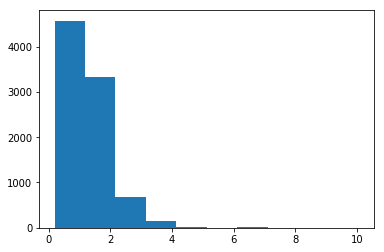

In [13]:
plt.hist(Rain)

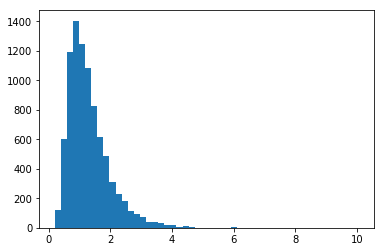

In [14]:
# Let's increase the number of bins to give us a more accurate reflection of the sampling fequency;
count, bins, ignored = plt.hist(Rain, 50)

In [15]:
#Now let's look at the statistics of the number array (ref = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html)
from scipy import stats
stats.describe(Rain)

DescribeResult(nobs=8760, minmax=(0.19094536446714283, 10.069679930457514), mean=1.299819455828553, variance=0.4901719657461914, skewness=2.157709486767057, kurtosis=10.956624683269752)

In [26]:
#Having read the paper on "Matching Temperature Data to a Normal Distribution" we will now deploy a random normal distribution
#generate comparable data to the target dataset.

In [28]:
Temp = np.random.normal(9.04, 4.54, 8760)
Temp

array([ 7.57737614,  9.08320437,  5.27147594, ..., -1.09340569,
       18.01070375, 10.59870826])

In [29]:
Temp.max()

25.199720555113153

In [30]:
Temp.min()

-6.926883637319428

In [31]:
Temp.mean()

9.148080833042277

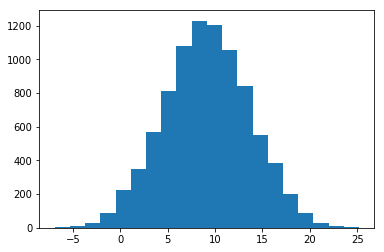

In [36]:
count, bins, ignored = plt.hist(Temp,20)

In [35]:
stats.describe(Temp)

DescribeResult(nobs=8760, minmax=(-6.926883637319428, 25.199720555113153), mean=9.148080833042277, variance=20.391935680208523, skewness=-0.0066489959252757965, kurtosis=-0.13291702472259193)

### Mean Sea Level Pressure (hPa)
Having read the paper *"Statistical Properties of the Atmospheric Pressure Field over the Artic Ocean"*<sup>[Ref](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281982%29039%3C2229%3ASPOTAP%3E2.0.CO%3B2)</sup>, we will employ a normal distribution to generate random pressure variables.

In [37]:
MSL = np.random.normal(1013.5, 13.22, 8760)
MSL

array([1001.68692374, 1002.4910251 , 1013.73908701, ..., 1004.7395911 ,
       1020.50888313, 1015.37603762])

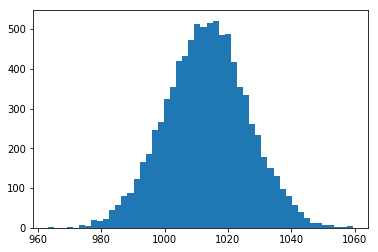

In [38]:
count, bins, ignored = plt.hist(MSL, 50,)

In [41]:
stats.describe(MSL)

DescribeResult(nobs=8760, minmax=(963.3038305211802, 1059.3582428396926), mean=1013.2599699111374, variance=169.9339887792238, skewness=7.475707581340877e-06, kurtosis=-0.028558095285320384)

### Wind Speed (WdSp) in knots
Having read the following paper *"Analytical study of different probability distributions for wind speed related to power statistics"*<sup>[Ref](https://ieeexplore.ieee.org/document/5211970)</sup>, we elected to use a wald distribution function in generating random varialbes for wind speed.

In [52]:
WdSp = np.random.wald(9.65,5.27, 8760)
WdSp

array([0.87337392, 5.85262464, 1.87101197, ..., 6.61349092, 2.57710556,
       3.60199762])

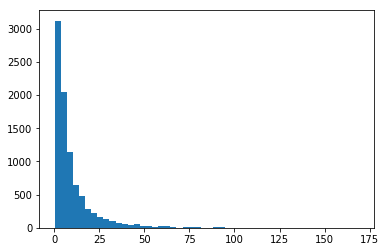

In [53]:
count, bins, ignored = plt.hist(WdSp, 50)

In [45]:
stats.describe(WdSp)

DescribeResult(nobs=8760, minmax=(-10.590344997864905, 31.21763812375236), mean=9.627883318180324, variance=28.728817778803496, skewness=-0.010980773798194912, kurtosis=0.07682968695747672)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


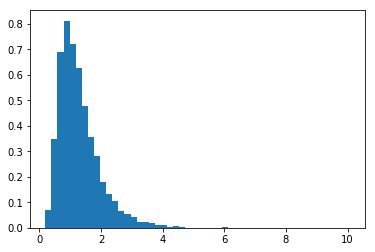

In [25]:
count, bins, ignored = plt.hist(Rain, 50, normed=True, align='mid')

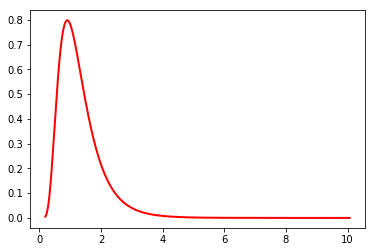

In [18]:
mu=0.14
sigma = 0.49

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.show()

In [19]:
df.max()

Datetime    1997-12-31 23:00:00
rain                          8
temp                       23.7
msl                      1045.1
wdsp                         39
wddir                       360
sun                           1
clamt                         8
dtype: object

In [20]:
df.min()

Datetime    1997-01-01 00:00:00
rain                          0
temp                       -3.8
msl                       968.3
wdsp                          0
wddir                         0
sun                           0
clamt                         0
dtype: object

In [21]:
df.std()

rain      0.493014
temp      4.541594
msl      13.229258
wdsp      5.273074
wddir    85.787768
sun       0.299735
clamt     2.304258
dtype: float64

In [22]:
df.iloc[:,2].mean()

9.038664383561642

In [23]:
df['msl']

3689     1031.2
3690     1031.4
3691     1031.7
3692     1031.7
3693     1031.7
3694     1031.8
3695     1032.0
3696     1032.0
3697     1032.0
3698     1032.4
3699     1032.5
3700     1032.4
3701     1032.1
3702     1031.8
3703     1031.6
3704     1031.3
3705     1031.4
3706     1031.7
3707     1031.5
3708     1031.5
3709     1031.6
3710     1031.8
3711     1031.5
3712     1031.3
3713     1030.8
3714     1030.0
3715     1029.3
3716     1028.4
3717     1027.5
3718     1026.3
          ...  
12419     978.0
12420     978.7
12421     979.2
12422     981.4
12423     983.3
12424     984.5
12425     986.0
12426     987.2
12427     988.4
12428     990.0
12429     990.8
12430     991.2
12431     991.9
12432     993.1
12433     993.8
12434     994.5
12435     995.6
12436     995.9
12437     996.4
12438     996.6
12439     997.4
12440     998.0
12441     998.2
12442     998.5
12443     999.4
12444     999.7
12445    1000.1
12446    1000.6
12447    1001.0
12448    1000.4
Name: msl, Length: 8760,

In [24]:
pd.to_numeric('msl')

ValueError: Unable to parse string "msl" at position 0

In [ ]:
#To tidy up the frame view we can set Datetime as the index as follows;
#df = df.set_index(['Datetime'])

In [ ]:
#df.describe(exclude=['Datetime'])

[The Probability Density Function of Rain Rate and the Estimation of Rainfall by Area Integrals](https://journals.ametsoc.org/doi/10.1175/1520-0450%281994%29033%3C1255%3ATPDFOR%3E2.0.CO%3B2)

[SIMULATING MAXIMUM AND MINIMUM DAILY TEMPERATURE
WITH THE NORMAL DISTRIBUTION](https://naldc.nal.usda.gov/download/27264/PDF)

[Matching Temperature Data to a Normal Distribution](http://demonstrations.wolfram.com/MatchingTemperatureDataToANormalDistribution/)



[Statistical Properties of the Atmospheric Pressure Field over the Artic Ocean](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281982%29039%3C2229%3ASPOTAP%3E2.0.CO%3B2)

[Probability distributions for offshore wind speeds](https://engineering.tufts.edu/cee/people/vogel/documents/probabilityDistributionsOffshoreWindSpeeds.pdf)

[Analytical study of different probability distributions for wind speed related to power statistics](https://ieeexplore.ieee.org/document/5211970)